# 과제3. 직원 이직 분석

* 여러분은 OO회사의 **데이터분석가** 입니다.
* **인사팀**에서는 여러분에게 우리 회사 직원의 **이직(Attrition)에 영향을 주는 요인**을 분석해달라고 요청해 왔습니다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

* 분석 단위 : 직원 한사람, 한사람...
* 설명에서 언급되어지지 않은 사항은 직접 고민하며 스스로 정해서 진행하시면 됩니다.^^
* 자\~! 이제 시작해 봅시다\~!

----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 3개 이상씩, 전체 6개 이상의 변수를 도출, 가설을 수립하시오.

* 가설1 : 집-직장 거리가 멀수록 이직률은 증가할 것이다.

* 가설2 : 월급이 적을수록 이직률은 증가할 것이다.

* 가설3 : 입사 전 근무한 회사 수가 많을 수록 이직률은 증가할 것이다.

* 가설4 : 직무 만족도가 낮을 수록 이직률은 증가할 것이다.

* 가설5 : 야근 여부가 많을 수록 이직률은 증가할 것이다.

* 가설6 : 워라밸이 높을수록 이직률은 적을 것이다.

* 가설7 : 총 경력 연수가 높을수록 이직률은 낮을 것이다.

* 가설8 : 여자가 이직률이 높을 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) Attrition (Target)

In [ ]:
#변수의 비즈니스 의미

이직여부 범주형 데이터 / 1- 이직, 0- 잔류

In [3]:
#결측치 여부

data['Attrition'].isna().sum()

0

In [4]:
#기초통계량

print(data['Attrition'].value_counts())
print(data['Attrition'].value_counts()/ len(data['Attrition']))

0    1050
1     200
Name: Attrition, dtype: int64
0    0.84
1    0.16
Name: Attrition, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


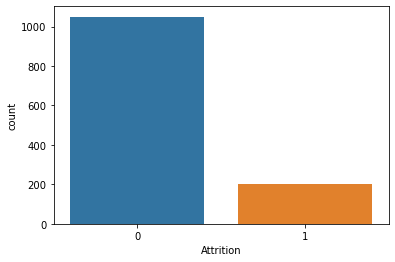

In [11]:
#분포

sns.countplot(data['Attrition'])
plt.show()

In [ ]:
#비즈니스 정리

기존회사에 잔류하는 사람이 84%를 차지한다.

### 2) DistanceFromHome

In [35]:
var= 'DistanceFromHome'

In [ ]:
# 변수의 의미 / 범주? 숫자?

집- 직장거리 / 숫자

In [22]:
#NaN 존재유무

data[var].isna().sum()

#nan값 54개 존재 => 결측치를 제외하고 시각화

54

In [24]:
#결측치 제거
data.dropna(subset=['DistanceFromHome'], axis=0, inplace=True)

In [25]:
data[var].isna().sum()

0

In [26]:
# 기초통계량
data[var].describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

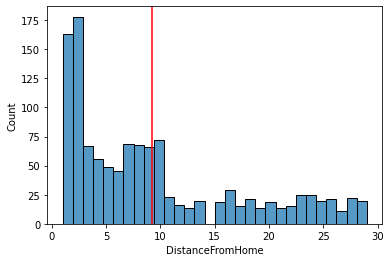

In [36]:
# 시각화

avg = data[var].mean()
sns.histplot(data[var], bins = 30)

plt.axvline(avg, color = 'r')

plt.show()

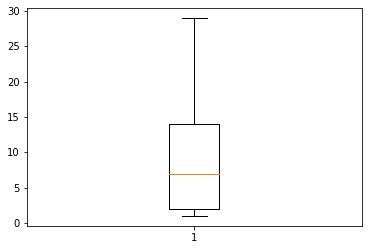

1.0 29.0


In [38]:
box = plt.boxplot(data[var])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

#### 파악한 내용

 0-5마일의 거리인 사람이 가장 많은 것으로 분석되고, 평균값은 9마일이지만 1,2마일의 거리에 분포하는 사람이 가장 많은 것으로 분석된다.
 
 10마일을 기준으로 두 그룹으로 나누어 이직여부와의 관계를 분석해 볼 필요가 있다.

### 3) MonthlyIncome

In [107]:
var= 'MonthlyIncome'

In [ ]:
# 변수의 의미 / 범주? 숫자?

월급/ 숫자

In [30]:
#NaN 존재유무

data[var].isna().sum()

0

In [31]:
# 기초통계량

data[var].describe()

count     1196.000000
mean      6520.104515
std       4665.902253
min       1009.000000
25%       2928.250000
50%       4973.500000
75%       8420.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

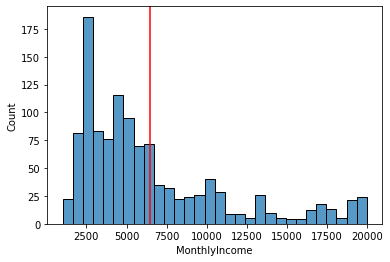

In [108]:
# 시각화

avg = data[var].mean()
sns.histplot(data[var], bins = 30)

plt.axvline(avg, color = 'r')

plt.show()

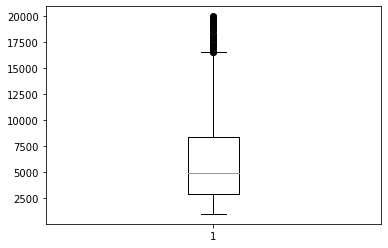

1009.0 16555.0


In [109]:
box = plt.boxplot(data[var])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

#### 파악한 내용

평균 월급은 6500달러 이지만 boxplot를 보았을 때, 2500~7500사이가 50%를 차지하고있다. histplot에서는 2500대의 월급 분포가 가장 많다.

-7500 ,7500-15000,15000~ 세 그룹으로 나누어 이직여부와의 관계를 분석해보면 월급과 이직여부와의 상관관계를 더 잘 알 수 있지 않을까?

### 4) NumCompaniesWorked

In [68]:
var= 'NumCompaniesWorked'

In [ ]:
# 변수의 의미 / 범주? 숫자?

입사 전 근무한 회사 수 / 숫자

In [44]:
#NaN 존재유무

data[var].isna().sum()

21

In [45]:
#결측치 제거
data.dropna(subset=['NumCompaniesWorked'], axis=0, inplace=True)

In [46]:
# 기초통계량

data[var].describe()

count    1175.000000
mean        2.694468
std         2.489726
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

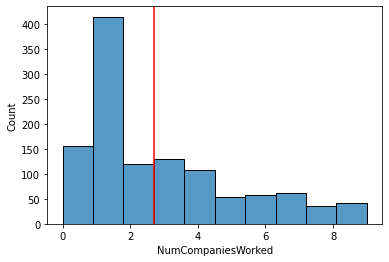

In [69]:
# 시각화

avg = data[var].mean()
sns.histplot(data[var], bins = 10)

plt.axvline(avg, color = 'r')

plt.show()

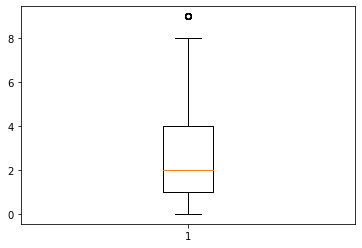

0.0 8.0


In [48]:
box = plt.boxplot(data[var])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

#### 파악한 내용

입사 전 근무한 회사 수는 1-4의 분포가 50%를 차지하고 있고, 입사 전 근무 한 회사 수가 1인 데이터가 30%정도로 분석된다. 

### 5) JobSatisfaction

In [49]:
var ='JobSatisfaction'

In [ ]:
# 변수의 의미 / 범주?숫자?

직무 만족도 / 범주형

In [50]:
#NaN 존재유무

data[var].isna().sum()

0

In [51]:
#기초통계량

print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

4    367
3    345
1    241
2    222
Name: JobSatisfaction, dtype: int64
4    0.312340
3    0.293617
1    0.205106
2    0.188936
Name: JobSatisfaction, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


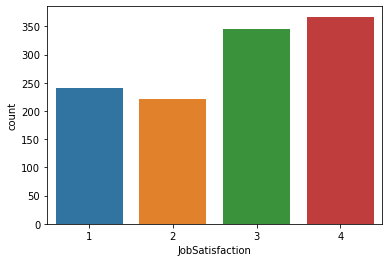

In [52]:
sns.countplot(data[var])
plt.show()

#### 파악한 내용

직무만족도가 가장 높은 4점인 데이터가 31%로 분석된다. 직무 만족도 조사 시 어떠한 질문으로 점수가 매겨졌는지 문항을 알면 분석에 도움이 되지 않을까?

### 6) OverTime

In [53]:
var='OverTime'

In [ ]:
# 변수의 의미 / 범주?숫자?

야근여부 / 범주형

In [54]:
#NaN 존재유무

data[var].isna().sum()

0

In [55]:
#기초통계량

print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

No     836
Yes    339
Name: OverTime, dtype: int64
No     0.711489
Yes    0.288511
Name: OverTime, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


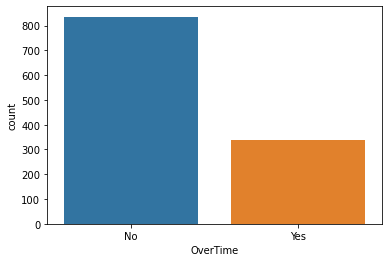

In [56]:
sns.countplot(data[var])
plt.show()

#### 파악한 내용
야근 여부가 no인 데이터가 71%로 분석되었다.

### 7) WorkLifeBalance

In [57]:
var='WorkLifeBalance'

In [ ]:
# 변수의 의미 / 범주?숫자?

워라밸 / 범주형

In [58]:
#NaN 존재유무

data[var].isna().sum()

0

In [59]:
#기초통계량

print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

3    697
2    285
4    127
1     66
Name: WorkLifeBalance, dtype: int64
3    0.593191
2    0.242553
4    0.108085
1    0.056170
Name: WorkLifeBalance, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


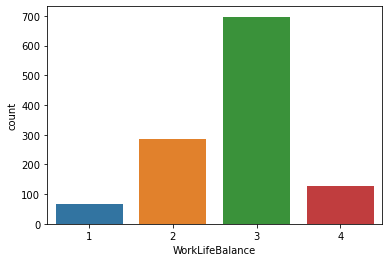

In [60]:
sns.countplot(data[var])
plt.show()

#### 파악한 내용
워라밸 점수가 3점인 59%로 데이터가 가장 높게 분석되었다. 3점이 절반이상을 차지하고 있고, 2점 24%, 4점 10%, 5점 5%로 나타난다.

### 8) TotalWorkingYears

In [129]:
var= 'TotalWorkingYears'

In [ ]:
# 변수의 의미

총 경력 연수 / 숫자

In [130]:
#NaN 존재유무

data[var].isna().sum()

0

In [131]:
# 기초통계량
data[var].describe()

count    1175.000000
mean       11.307234
std         7.841927
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

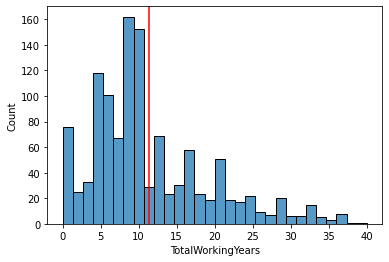

In [133]:
# 시각화

avg = data[var].mean()
sns.histplot(data[var], bins = 30)

plt.axvline(avg, color = 'r')

plt.show()

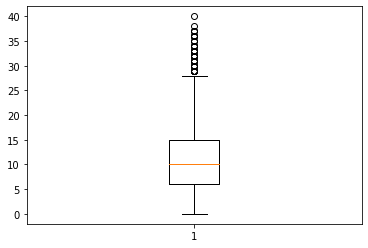

0.0 28.0


In [134]:
box = plt.boxplot(data[var])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

#### 파악한 내용
* 총 경력 연수가 10년을 기준으로 2그룹으로 나뉜다.
* 2그룹을 통해 이직여부 분석
* 경력 연수 5-10년 구간에서 가장 많은 데이터가 나타남

### 9) Gender

In [135]:
var='Gender'

In [ ]:
# 변수의 의미 / 범주?숫자?

성별 / 범주형

In [136]:
#NaN 존재유무

data[var].isna().sum()

0

In [137]:
#기초통계량

print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Male      715
Female    460
Name: Gender, dtype: int64
Male      0.608511
Female    0.391489
Name: Gender, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


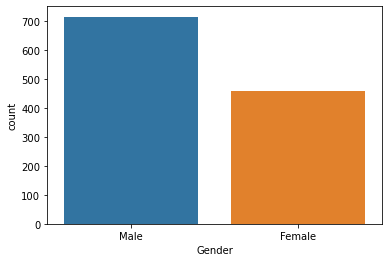

In [138]:
sns.countplot(data[var])
plt.show()

#### 파악한 내용

* 남자가 60% 여자가 40%로 남성이 더 많이 응답했다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [ ]:
target = 'Attrition'

#### 1) JobSatisfaction --> Attrition

In [61]:
#교차표
temp = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'index')
print(temp)

Attrition               0         1
JobSatisfaction                    
1                0.788382  0.211618
2                0.833333  0.166667
3                0.828986  0.171014
4                0.871935  0.128065


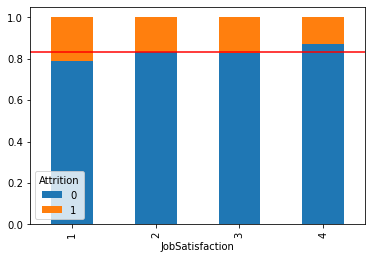

In [62]:
#시각화

# 2) stacked bar!
temp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

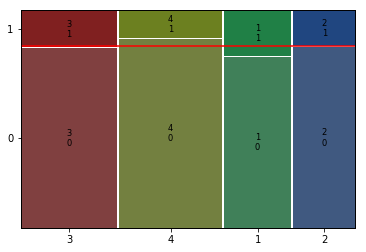

In [63]:
mosaic(data, [ 'JobSatisfaction','Attrition'])

plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

#### 시각화 후 파악한 내용

대부분의 데이터가 평균값과 큰 차이를 보이지 않았지만 특히, 직무 만족도가 2,3점인 데이터는 평균값과 일정한 비율이 나타났다. 1이라고 응답한 사람은 이직률이 높은 반면 4라고 응답한 사람은 이직률이 높지 않았다.

In [66]:
# 먼저 집계 ( nomalize 사용 안함) 카이제곱 값이 클수록 상관관계가 있다.
table = pd.crosstab(data['JobSatisfaction'], data['Attrition'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Attrition          0   1
JobSatisfaction         
1                190  51
2                185  37
3                286  59
4                320  47
----------------------------------------------------------------------------------------------------
카이제곱통계량 7.526414509503983
p-value 0.05688362049018379
기대빈도
 [[201.2093617   39.7906383 ]
 [185.34638298  36.65361702]
 [288.03829787  56.96170213]
 [306.40595745  60.59404255]]


#### 수치화 후 파악한 내용

p-value 값이 0.05로 유의수준과 동일하게 나옴. 직무 만족도와 이직률은 관련이 없다고 볼 수 있음

#### 2) OverTime --> Attrition

In [77]:
#교차표
temp = pd.crosstab(data['OverTime'], data['Attrition'], normalize = 'index')
print(temp)

Attrition         0         1
OverTime                     
No         0.892344  0.107656
Yes        0.693215  0.306785


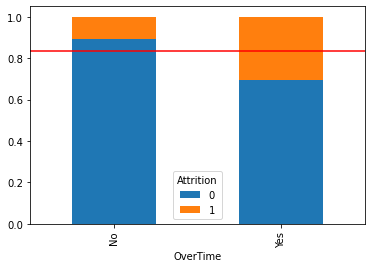

In [78]:
#시각화

# 2) stacked bar!
temp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

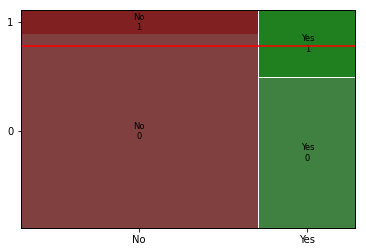

In [79]:
mosaic(data, ['OverTime','Attrition'])

plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

#### 시각화 후 파악한 내용

야근 여부에 no라고 응답한 사람이 이직을 하지 않고 잔류하는 확률이 높다. 반면, Yes라고 응답한 사람은 이직 할 확률이 높게 나타난다.

In [81]:
# 먼저 집계 ( nomalize 사용 안함) 카이제곱 값이 클수록 상관관계가 있다.
table = pd.crosstab(data['OverTime'], data['Attrition'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Attrition    0    1
OverTime           
No         746   90
Yes        235  104
----------------------------------------------------------------------------------------------------
카이제곱통계량 67.94430713157854
p-value 1.68179274370229e-16
기대빈도
 [[697.97106383 138.02893617]
 [283.02893617  55.97106383]]


#### 수치화 후 파악한 내용

이직여부와 이탈여부는 시각화를 통해서도 관련이 있다고 분석하였다. p-value값이 0에 수렴하므로 수치화를 통해서도 위와 동일하게 판단된다. 강한상관관계로 판단

#### 3) WorkLifeBalance --> Attrition

In [72]:
#교차표
temp = pd.crosstab(data['WorkLifeBalance'], data['Attrition'], normalize = 'index')
print(temp)

Attrition               0         1
WorkLifeBalance                    
1                0.712121  0.287879
2                0.845614  0.154386
3                0.847920  0.152080
4                0.803150  0.196850


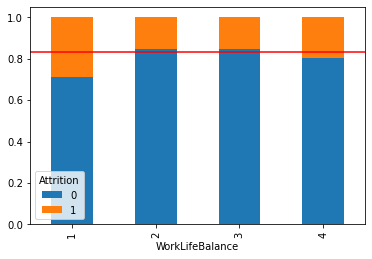

In [73]:
#시각화

# 2) stacked bar!
temp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

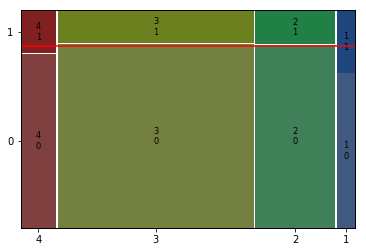

In [75]:
mosaic(data,['WorkLifeBalance','Attrition'])

plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

#### 시각화 후 파악한 내용
워라밸이 2,3이라고 응답한 사람은 평균수치보다 미세하게 더 잔류하는 경향이 나타났고, 워라밸 점수가 1인 사람은 이직을 할 확률이 높게 나타났다. 

 + 워라밸과 야근여부가 관련이 있지 않을까?
 + 워라밸과 월급의 관련도가 클까?

In [76]:
# 먼저 집계 ( nomalize 사용 안함) 카이제곱 값이 클수록 상관관계가 있다.
table = pd.crosstab(data['WorkLifeBalance'], data['Attrition'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Attrition          0    1
WorkLifeBalance          
1                 47   19
2                241   44
3                591  106
4                102   25
----------------------------------------------------------------------------------------------------
카이제곱통계량 9.240855870810798
p-value 0.026254193750411485
기대빈도
 [[ 55.10297872  10.89702128]
 [237.94468085  47.05531915]
 [581.92085106 115.07914894]
 [106.03148936  20.96851064]]


#### 수치화 후 파악한 내용

워라밸 시각화에서 1,4점에서 평균값과 차이가 났지만 2,3에서 평균수치와 비슷하게 나타나 p-value 값이 0.05와 가깝게 나온 것으로 분석된다. p-value 값이 0.02로 유의 수준보다 작게 나왔으므로 약한 관계로 판단된다.

#### 4) Gender --> Attrition

In [139]:
#교차표
temp = pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')
print(temp)

Attrition         0         1
Gender                       
Female     0.856522  0.143478
Male       0.820979  0.179021


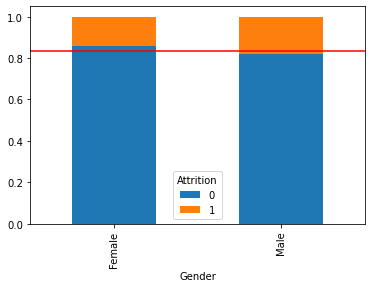

In [140]:
#시각화

# 2) stacked bar!
temp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

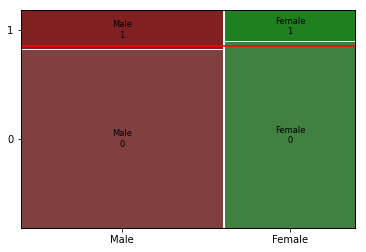

In [141]:
mosaic(data,['Gender','Attrition'])

plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

#### 시각화 후 파악한 내용

* 남성은 평균수치보다 이직할 확률이 미세하게 적게 나타났고, 여성은 평균 수치보다 조금 더 높게 나타났다.
* 두 데이터 모두 평균과 큰 차이가 나타나지 않았다.

In [142]:
# 먼저 집계 ( nomalize 사용 안함) 카이제곱 값이 클수록 상관관계가 있다.
table = pd.crosstab(data['Gender'], data['Attrition'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Attrition    0    1
Gender             
Female     394   66
Male       587  128
----------------------------------------------------------------------------------------------------
카이제곱통계량 2.3139012436730098
p-value 0.1282218761328402
기대빈도
 [[384.05106383  75.94893617]
 [596.94893617 118.05106383]]


#### 수치화 후 파악한 내용

* p-value 값이 0.12로 유의수준 0.05보다 크게 나타났으므로 성별은 이직여부와 관련이 없다고 판단된다.

+ 직업과 성별의 이직여부가 관련이 있지 않을까?

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) DistanceFromHome --> Attrition

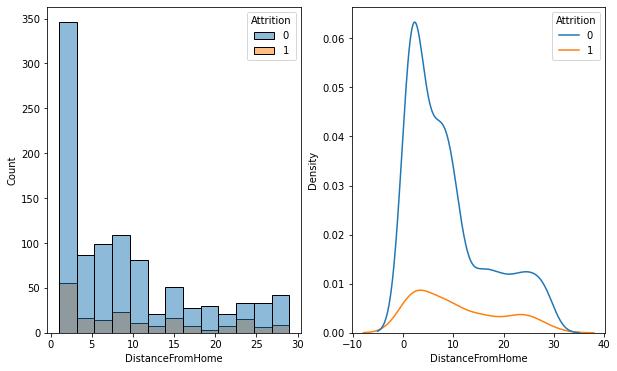

In [117]:
plt.figure(figsize = (10, 6))

plt.subplot(1,2,1)
sns.histplot(x = 'DistanceFromHome', data = data, hue = 'Attrition')

plt.subplot(1,2,2)
sns.kdeplot(x = 'DistanceFromHome', data = data, hue = 'Attrition')

plt.show()

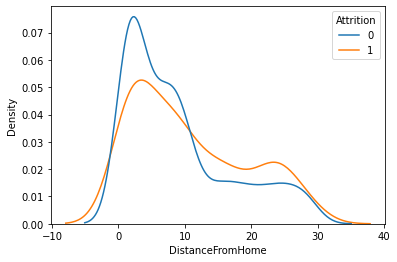

In [121]:
sns.kdeplot(x='DistanceFromHome', data =data, hue = 'Attrition', common_norm=False) 
plt.show()

#### 시각화 후 파악한 내용
* 10마일 부터 크로스 구간 발생 , 회사와 집이 10마일 이상 차이가 날 수록 이직할 확률이 커짐


In [99]:
#로지스틱회귀

model= sm.Logit(data['Attrition'], data['DistanceFromHome'])
result= model.fit()
result.pvalues

Optimization terminated successfully.
         Current function value: 0.570401
         Iterations 6


DistanceFromHome    3.022649e-43
dtype: float64

#### 수치화 후 파악한 내용
* 10마일 이상 차이가 날 수록 이직하는 경향이 뚜렷하게 보임
* 강한 상관관계가 있음


#### 2) MonthlyIncome --> Attrition

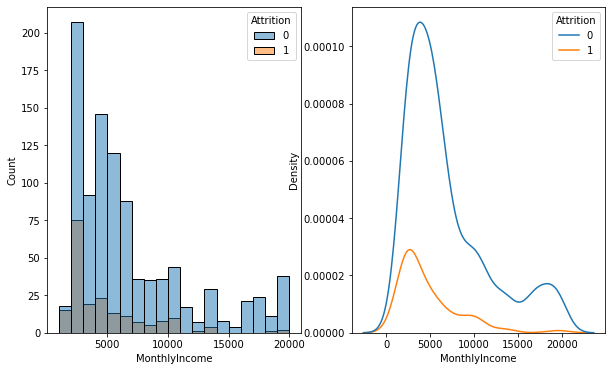

In [118]:
plt.figure(figsize = (10, 6))

plt.subplot(1,2,1)
sns.histplot(x = 'MonthlyIncome', data = data, hue = 'Attrition')

plt.subplot(1,2,2)
sns.kdeplot(x = 'MonthlyIncome', data = data, hue = 'Attrition')

plt.show()

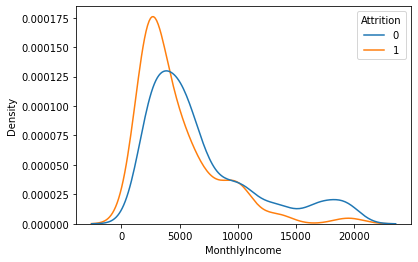

In [122]:
sns.kdeplot(x='MonthlyIncome', data =data, hue = 'Attrition', common_norm=False) 
plt.show()

#### 시각화 후 파악한 내용
* 5000달러에서 크로스 구간 발생
* 5000달러 이하에서 이직할 확률이 크게 나타남
* 5000달러 이상은 이직을 하지 않을 확률이 높음

In [100]:
#로지스틱회귀

model= sm.Logit(data['Attrition'], data['MonthlyIncome'])
result= model.fit()
result.pvalues

Optimization terminated successfully.
         Current function value: 0.446138
         Iterations 6


MonthlyIncome    1.754553e-66
dtype: float64

#### 수치화 후 파악한 내용
* 수치화를 통해 보았을 때, 월급과 이직여부는 큰 상관관계가 있어보인다.
* 5000달러를 기준으로 이직여부를 결정하는 데이터로 보인다.

#### 3) NumCompaniesWorked --> Attrition

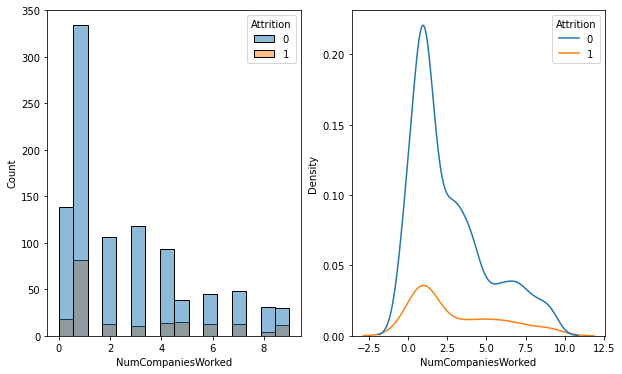

In [119]:
plt.figure(figsize = (10, 6))

plt.subplot(1,2,1)
sns.histplot(x = 'NumCompaniesWorked', data = data, hue = 'Attrition')

plt.subplot(1,2,2)
sns.kdeplot(x = 'NumCompaniesWorked', data = data, hue = 'Attrition')

plt.show()

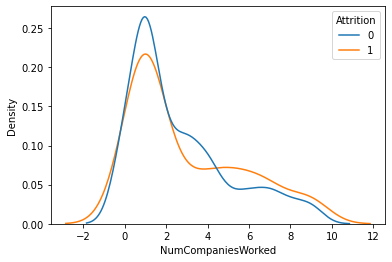

In [123]:
sns.kdeplot(x='NumCompaniesWorked', data =data, hue = 'Attrition', common_norm=False) 
plt.show()

#### 시각화 후 파악한 내용
* 4이상 구간에서 크로스 발생
* 입사 전 근무한 회사 수가 많을 수록 이직률이 높아진다.

In [126]:
#로지스틱회귀

model= sm.Logit(data['Attrition'], data['NumCompaniesWorked'])
result= model.fit()
result.pvalues

Optimization terminated successfully.
         Current function value: 0.567510
         Iterations 6


NumCompaniesWorked    5.862322e-43
dtype: float64

#### 수치화 후 파악한 내용
* 입사한 회사 수와 이직률은 강한 상관관계로 보인다.

#### 4)TotalWorkingYears --> Attrition

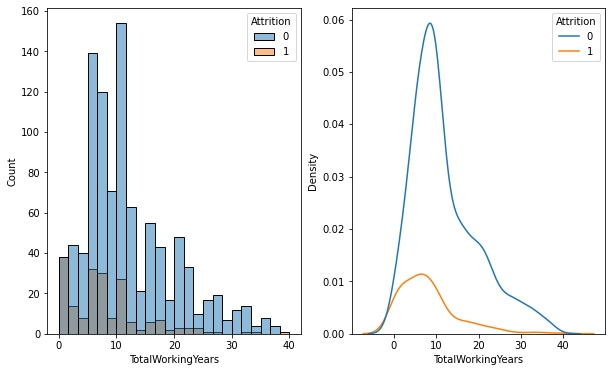

In [143]:
plt.figure(figsize = (10, 6))

plt.subplot(1,2,1)
sns.histplot(x = 'TotalWorkingYears', data = data, hue = 'Attrition')

plt.subplot(1,2,2)
sns.kdeplot(x = 'TotalWorkingYears', data = data, hue = 'Attrition')

plt.show()

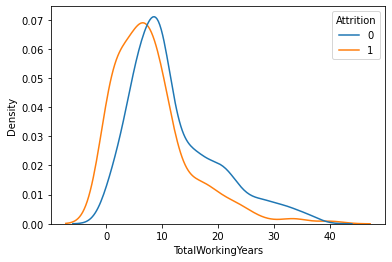

In [144]:
sns.kdeplot(x='TotalWorkingYears', data =data, hue = 'Attrition', common_norm=False) 
plt.show()

#### 시각화 후 파악한 내용
* 8-9에서 크로스 구간 발생
* 총 경력 연수가 10년 이상인 사람은 이직할 확률이 낮은 반면 10년 이하인 사람은 이직할 확률이 높다.

In [145]:
#로지스틱회귀

model= sm.Logit(data['Attrition'], data['TotalWorkingYears'])
result= model.fit()
result.pvalues

Optimization terminated successfully.
         Current function value: 0.441666
         Iterations 6


TotalWorkingYears    5.882972e-69
dtype: float64

#### 수치화 후 파악한 내용
 * p-value 값을 통해 총 경력 연수와 이직여부는 강한 상관관계가 있다고 판단된다.

## 4.관계 정리

### 1) 강한관계의 변수

DistanceFromHome, MonthlyIncome, NumCompaniesWorked, OverTime, TotalWorkingYears

### 2) 약한관계의 변수

WorkLifeBalance

### 3) 관계 없음

JobSatisfaction, Gender

## 5.추가 분석